In [1]:
import numpy as np
import os
import imageio as io
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
class Image:
    def __init__(self, data, label):
        self.data = data
        self.label = label
    
    def get_threshold_features(self):
        
        # number of red pixels after thresh
        r = self.data[:,:,0]
        r_num_thresheds = len(r[r <= min(r) + 40])
        
        # number of green pixels after thresh
        g = self.data[:,:,1]
        g_num_thresheds = len(g[g <= min(g) + 40])
        
        # number of blue pixels after thresh
        b = self.data[:,:,2]
        b_num_thresheds = len(b[b <= min(b) + 40])
        
        return r_num_thresheds, g_num_thresheds, b_num_thresheds
    
    def get_histogram_features(self):
         # r histogram
        r_hist_f, _ = np.histogram(self.data[:,:,0], bins=10, range=(0, 255))
        # g histogram
        g_hist_f, _ = np.histogram(self.data[:,:,1], bins=10, range=(0, 255))
        # b histogram
        b_hist_f, _ = np.histogram(self.data[:,:,2], bins=10, range=(0, 255))
        
        return r_hist_f, g_hist_f, b_hist_f
    
    def get_grayscale(self):
        return np.dot(self.data[...,:3], [0.299, 0.587, 0.144])
    
    def get_num_purple(self):
        r = self.data[:,:,0].ravel()
        g = self.data[:,:,1].ravel()
        b = self.data[:,:,2].ravel()
        
        p = (138, 45, 135)
        t_r = 40 / 2
        t_g = 60 / 2
        t_b = 4 / 2
        
        purple = []
        for r_, g_, b_ in zip(r, g, b):
            if((r_ > p[0] - t_r and r_ < p[0] + t_r) and
               (g_ > p[1] - t_g and g_ < p[1] + t_g) and
               (b_ > p[2] - t_b and b_ < p[2] + t_b)):
                purple += (r_, g_, b_)
               
        print(purple)
        return len(purple)
        
        
                                
    def get_features(self, thresholds=False, hist=False):
        # mean
        mean_f = np.mean(self.data)
        # max
        max_f = np.max(self.data)
        # min
        min_f = np.min(self.data)
        
        # min r
        min_r_f = np.min(self.data[:,:,0])
        # max r
        max_r_f = np.max(self.data[:,:,0])
        
        # min g
        min_g_f = np.min(self.data[:,:,1])
        # max g
        max_g_f = np.max(self.data[:,:,1])
        
        # min b
        min_b_f = np.min(self.data[:,:,2])
        # max b
        max_b_f = np.max(self.data[:,:,2])
        
        # number of pixels above thresh
        gray = self.get_grayscale()
        num_gray_a = len(gray[gray >= mean_f])
        
        # number of pixels below thresh
        gray = self.get_grayscale()
        num_gray_b = len(gray[gray <= mean_f])
        
        
        # mean of r + + g + b + gray channel
        mean_r_f = np.mean(self.data[:,:,0])
        mean_g_f = np.mean(self.data[:,:,1])
        mean_b_f = np.mean(self.data[:,:,2])
        mean_gray_f = np.mean(gray)

        
        # num purple
        num_p_f = self.get_num_purple()

        features = [mean_f, max_f, min_f, mean_r_f, mean_b_f, num_p_f]
        
        if hist:
            r_hist_f, g_hist_f, b_hist_f = self.get_histogram_features()
            features += r_hist_f.tolist()
            features += g_hist_f.tolist()
            features += b_hist_f.tolist()
        if thresholds:
            features += self.get_threshold_features()
            
        return np.array(features)
        
    def show(self):
        plt.figure()
        plt.imshow(self.data)

In [3]:
def load_images(path):
    imgs = []
    for img in os.listdir(path):
        if (img.endswith(".png")):
            imgs.append(Image(io.imread(path + img), img[0]))
            
    return imgs

def read_images():
    neg_path = os.getcwd() + "/negatives/"
    pos_path = os.getcwd() + "/positives/"
    neg_imgs = np.array(load_images(neg_path))
    pos_imgs = np.array(load_images(pos_path))
    
    print("positives: " + str(pos_imgs.shape))
    print("negatives: " + str(neg_imgs.shape))
    
    return pos_imgs, neg_imgs

In [4]:
pos_imgs, neg_imgs = read_images()

positives: (30,)
negatives: (30,)


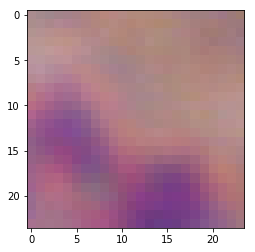

In [5]:
bb = neg_imgs[12]
bb.show()
#r = bb.data[:,:,0].ravel()
#len(r[r <= min(r) + 40])
#print(r)
#print(max(r), min(r))
#print(len(r[r <= min(r) + 40]))
#print(len(r))
#plt.imshow(r.reshape(24,24))
#r[r >= min(r) + 40] = 0
#r[r < min(r) + 5] = 255
#plt.figure()
#plt.imshow(r.reshape(24,24), cmap="gray")
#print(r)

#for i in neg_imgs:
#    r = i.data[:,:,0].ravel()
#    print(len(r[r <= min(r) + 40]))

rgb = bb.data[:,:]
r = bb.data[:,:, 0].ravel()
g = bb.data[:,:, 1].ravel()
b = bb.data[:,:, 2].ravel()
    

In [6]:
from sklearn.cluster import KMeans

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
r = r.reshape(24,24)
kmeans = KMeans(n_clusters=2).fit(r.reshape(24,24))

centers = kmeans.cluster_centers_
y_kmeans = kmeans.predict(r.reshape(24,24))
plt.scatter(r[:, 0], r[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);


In [ ]:
def split_train_test(pos_imgs, neg_imgs):
    # 80% -> 24 training vectors
    train_set = np.concatenate((pos_imgs[:24], neg_imgs[:24]))
    # 20% -> 6 test vectors
    test_set = np.concatenate((pos_imgs[24:], neg_imgs[24:]))
    
    np.random.shuffle(train_set)
    np.random.shuffle(test_set)
    
    return train_set, test_set

train_set, test_set = split_train_test(pos_imgs, neg_imgs)
print("train_set: " + str(train_set.shape))
print("test_set: " + str(test_set.shape))

In [ ]:
def MLE(imgs, hist=False):
    features = np.array([img.get_features(hist=hist) for img in imgs])
    print("features: " + str(features.shape))
    labels = np.array([img.label for img in imgs])
    print("labels: " + str(labels.shape))
    pos = features[labels == 'p']
    print("pos: " + str(pos.shape))
    neg = features[labels == 'n']
    print("neg: " + str(neg.shape))
    phi = 1 / len(features) * len(pos)
    print("phi: " + str(phi))
    mean_pos = np.array([(np.sum(pos[:, i]) / len(pos)) for i in range(pos.shape[1])])
    print("mean_pos: " + str(mean_pos.shape))
    mean_neg = np.array([(np.sum(neg[:, i]) / len(pos)) for i in range(neg.shape[1])])
    print("mean_neg: " + str(mean_neg.shape))

    #cov = np.diag(np.array([np.var(features[:, i]) for i in range(features.shape[1])]))
    cov = np.cov(features, rowvar=False)
    #cov = np.sum(np.dot((pos - mean_pos), (pos - mean_pos).T))
    #cov += np.sum(np.dot((neg - mean_neg), (neg - mean_neg).T))
    
    print("cov: " + str(cov.shape))
    #print("cov: " + str(cov))
    
    return phi, mean_pos, mean_neg, cov

In [ ]:
def cond_prob(x, phi, cov, mean):
    # x -> feature vector
    frac = 1 / np.sqrt(2 * np.pi * np.linalg.det(cov))
    a = np.dot((x - mean).T, np.linalg.inv(cov))
    b = np.dot(a, (x - mean))
    return frac * np.exp(-b/2)

In [ ]:
def classify(img, phi, mean_pos, mean_neg, cov, hist=False):
    f = img.get_features(hist=hist)
    p_pos = cond_prob(f, phi, cov, mean_pos)
    p_neg = cond_prob(f, phi, cov, mean_neg)
    
    return 'p' if p_pos > p_neg else 'n'

In [ ]:
class Evaluation:
    
    def __init__(self, trueLabel = 'p', falseLabel = 'n'):
        self.tp = []
        self.tn = []
        self.fp = []
        self.fn = []
        self.trueLabel = trueLabel
        self.falseLabel = falseLabel
        self.total = 0
        
    def add(self, pred, label):
        if pred != self.trueLabel and pred != self.falseLabel or label != self.trueLabel and label != self.falseLabel:
            print("Error! Prediction and Label have to be either '"
                  + str(self.trueLabel) +"' or '"+str(self.falseLabel)+"' !")
            return
        
        if pred == label:
            if pred == self.trueLabel:
                self.tp.append((pred, label))
            if pred == self.falseLabel:
                self.tn.append((pred, label))
        if pred != label:
            if pred == self.trueLabel:
                self.fp.append((pred, label))
            if pred == self.falseLabel:
                self.fn.append((pred, label))
        self.total += 1
        
    def acc(self, v = True):
        trues = len(self.tp) + len(self.tn)
        acc = trues / self.total
        if v:
            print("Accuracy: %i / %i -> %f" % (trues, self.total, acc))
        return acc
    
    def prec(self, v = True):
        pred_pos = (len(self.tp) + len(self.fp))
        prec = len(self.tp) / pred_pos
        if v:
            print("Precision: %i / %i -> %f" % (len(self.tp), pred_pos, prec))
        return prec
    
    def rec(self, v = True):
        cond_pos = (len(self.tp) + len(self.fn))
        rec = len(self.tp) / cond_pos
        if v:
            print("Recall: %i / %i -> %f" % (len(self.tp), cond_pos, rec))
        return rec
    
    def f1(self, v = True):
        rec = self.rec(False)
        prec = self.prec(False)
        f1 = 2 * prec * rec / (prec + rec)
        if v:
            print("F1: %f" % (f1))
        return f1
    
    def print_summary(self):
        self.acc(True)
        self.prec(True)
        self.rec(True)
        self.f1(True)
        

In [ ]:
# get images
pos_imgs, neg_imgs = read_images()

# split into train and test
train_set, test_set = split_train_test(pos_imgs, neg_imgs)
print("train_set: " + str(train_set.shape))
print("test_set: " + str(test_set.shape))

# do maximum likelihood estimation (train model)
phi, mean_pos, mean_neg, cov = MLE(train_set)

evaluation = Evaluation('p', 'n')

for img in np.concatenate((train_set, test_set)):
    pred = classify(img, phi, mean_pos, mean_neg, cov)
    evaluation.add(pred, img.label)
    if pred != img.label:
        print("Label: %s Prediction: %s" % (img.label, pred))
        plt.figure()
        img.show()
        
evaluation.print_summary()

print(phi)
print(mean_pos)
print(mean_neg)
print(cov)

In [ ]:
dd